## Designing a database for the yoga booking system 

First, let us create the database we will work with. The relational diagram looks like this: 

We jave **6 tables**: 
- Members 
- Memberships
- Classes 
- Instructors 
- Schedule 
- Reservations

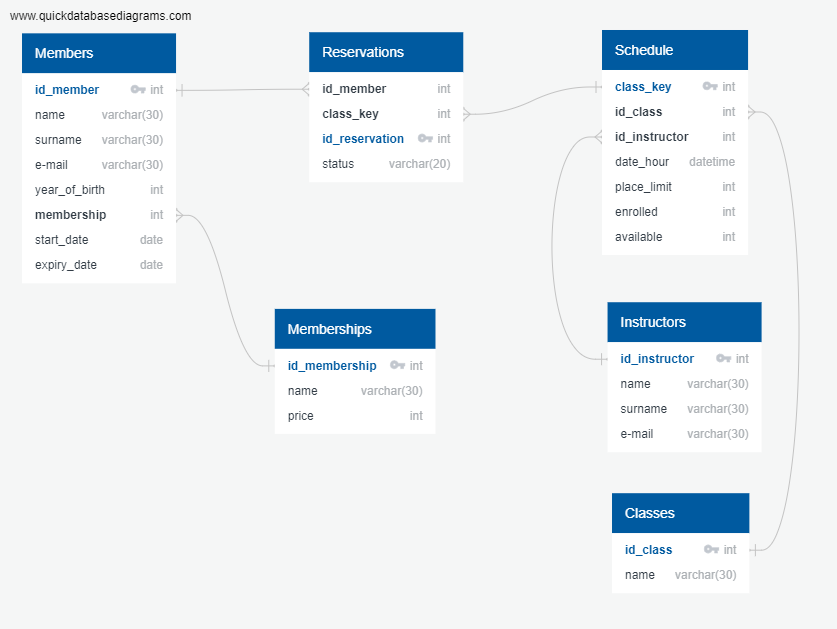

### Create the database and tables

In [22]:
import sqlite3

In [23]:


conn = sqlite3.connect('yoga.db')

c = conn.cursor()

c.execute('''CREATE TABLE Members (
                id_member INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, 
                member_name VARCHAR(30) NOT NULL, 
                member_surname VARCHAR(30) NOT NULL, 
                member_email VARCHAR(30)  NOT NULL ,
                year_of_birth INTEGER  NOT NULL ,
                membership INTEGER  NOT NULL ,
                password VARCHAR(10) NOT NULL)''')

c.execute('''CREATE TABLE Memberships (
            id_membership INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            membership_name VARCHAR(30)   NOT NULL,
            price INTEGER   NOT NULL)''')

c.execute('''CREATE TABLE Instructors (
            id_instructor INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            instructor_name VARCHAR(30)   NOT NULL,
            instructor_surname VARCHAR(30)   NOT NULL,
            instructor_email VARCHAR(30)   NOT NULL
)''')

c.execute('''CREATE TABLE Classes (
    id_class INTEGER      PRIMARY KEY AUTOINCREMENT NOT NULL,
    class_name     VARCHAR (30) NOT NULL
)''')

c.execute('''CREATE TABLE Schedule (
    class_key     INTEGER  PRIMARY KEY AUTOINCREMENT NOT NULL,
    class_id      INTEGER  REFERENCES Classes (id_class) 
                           NOT NULL,
    instructor_id INTEGER  REFERENCES Instructors (id_instructor) 
                           NOT NULL,
    date_hour     DATETIME NOT NULL,
    place_limit   INTEGER  NOT NULL,
    enrolled      INTEGER,
    available     INTEGER
)''')

c.execute('''CREATE TABLE Reservations (
    id_member      INTEGER      REFERENCES Members (id_member) 
                                NOT NULL,
    key_class      INTEGER      NOT NULL
                                REFERENCES Schedule (class_key),
    id_reservation INTEGER      PRIMARY KEY AUTOINCREMENT NOT NULL,
    status         VARCHAR (20) NOT NULL
)''')

conn.commit()
conn.close()


### Insert some data into tables 

In [24]:
conn = sqlite3.connect('yoga.db')
c = conn.cursor()

c.execute('''
INSERT INTO Members (member_name, member_surname, member_email, year_of_birth, membership, password) VALUES
('Kate', 'Smith', 'katesmith@yahoo.com', '1998', '3', '12345678'), 
('Olivia', 'Kuligowska', 'oliviakul@gmail.com', '1995', '1', '01010101'), 
('Giorgia', 'Bianchi', 'gbianci@gmail.com', '1999', '2', '15151515'), 
('Rosalia', 'Ricci', 'riccirosa@yahoo.com', '2000', '3', '45454545'), 
('Pablo', 'Morales', 'pmorales@gmail.com', '1998', '2', '57575757')
''')

c.execute('''
INSERT INTO Memberships (membership_name, price) VALUES
('multisport', '0'), 
('4_x_week', '160'),
('8_x_month', '250'),
('unlimited','400')
''')

c.execute('''
INSERT INTO Instructors (instructor_name, instructor_surname, instructor_email) VALUES
('Cindy', 'Crawford', 'cindy@gmail.com'),
('Naomi', 'Campbell', 'blackpanther@gmail.com'), 
('Claudia', 'Schiffer', 'claudiaschiffer@gmail.com'),
('Kate', 'Moss', 'katemoss@gmail.com')
''')

c.execute('''
INSERT INTO Classes (class_name) VALUES
('Yoga for beginners'),
('Kundalini yoga'), 
('Vinyasa yoga'),
('Prenatal yoga'), 
('Stretching')
''')


conn.commit()
conn.close()

In [25]:
conn = sqlite3.connect('yoga.db')
c = conn.cursor()

c.execute('''INSERT INTO Schedule (class_key, class_id, instructor_id, date_hour, place_limit, enrolled, available) VALUES 
            (1, 1, 1, '2021-01-02 07:00', 10, 2, 8),
            (2, 1, 1, '2021-01-02 17:00', 10, 9, 1),
            (3, 2, 2, '2021-01-02 18:00', 5, 5, 0),
            (4, 3, 3, '2021-01-02 19:00', 10, 10, 0),
            (5, 4, 3, '2021-01-02 20:00', 10, 8, 2),
            (6, 1, 1, '2021-01-03 07:00', 10, 2, 8),
            (7, 1, 1, '2021-01-03 17:00', 10, 9, 1),
            (8, 2, 2, '2021-01-03 18:00', 5, 5, 0),
            (9, 3, 3, '2021-01-03 19:00', 10, 10, 0),
            (10, 5, 3, '2021-01-03 20:00', 10, 8, 2);
''')

c.execute('''INSERT INTO Reservations (id_member, key_class, status) VALUES 
('3', '1', 'active'),
('4', '1', 'active')
''')

conn.commit()
conn.close()